# Linear Regression Homework

In [776]:
import pandas as pd
import matplotlib.pyplot as plt

## Task 1
Using the Housing dataset attached, upload the dataset into your coding environment.

In [777]:
df = pd.read_csv('datasets/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


## Task 2
Use the .info() function to get a summary of the dataset

In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [779]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Observation:
There are 10 columns and 20640 rows in the dataset. Each row describes an area (a block of buildings).

The columns in the dataset are:
* `longitude` - a coordinate that specifies the east–west position of the area
* `latitude` - a coordinate that specifies the north–south position of the area
* `housing_median_age` - the median age of the building in the area
* `total_rooms` - total number of rooms in the area
* `total_bedrooms` - total number of bedrooms in the area
* `population` - total number of people living in the area
* `households` - total number of housing units in the area
* `median_income` - the median income in the area
* `median_house_value` - the median house value in the area
* `ocean_proximity` - the location of the building relative to the ocean

There are 9 numeric columns and 1 column (`ocean_proximity`) that has object datatype.

The column `total_bedrooms` contains `null` values.

## Task 3
Use .isna() and .sum() to find out how many missing values there are in each column.

In [780]:
df.isna().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Observation

There are 207 missing values in `total_bedrooms` column.

## Task 4
What defines whether a column is a categorical column or a numerical column?

### Answer
The column's datatype defines whether a column is categorical or numerical.

## Task 5
In this dataset, which columns are categorical columns and which columns are numerical columns?

In [781]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

### Observation:
**Numeric** columns:
- `longitude`, `latitude`, `total_bedrooms`, `median_income` have **float64** datatype.
- `housing_median_age`, `total_rooms`, `population`, `households`, `median_house_value` have **int64** datatype

**Categorical column**:
- `ocean_proximity` has **object** datatype

## Task 6
Use encoding to convert the categorical columns into numerical columns, if it makes sense to do so. (When a categorical column is an ID column, for example, it doesn’t make sense to encode that column.)

Let's look at the unique values in `ocean_proximity` column.

In [782]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Let's explore whether there's any correlation between `ocean_proximity` and `median_house_value`.

In [783]:
df.groupby('ocean_proximity').agg({'median_house_value': 'mean'}).sort_values(by='median_house_value')

,median_house_value
ocean_proximity,
INLAND,124805.392001
<1H OCEAN,240084.285464
NEAR OCEAN,249433.977427
NEAR BAY,259212.311790
ISLAND,380440.000000


There is a certain correlation between price and location relative to the ocean. Housing inland is the cheapest, and on the island is the most expensive. 

We can convert this categorical column into numerical one using this order:
- INLAND - 1
- <1H OCEAN - 2
- NEAR OCEAN - 3
- NEAR BAY - 4
- ISLAND - 5

In [784]:
mapping_ocean_proximity = {
    'INLAND': 1,
    '<1H OCEAN': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5
}

df['ocean_proximity'] = df['ocean_proximity'].map(mapping_ocean_proximity)

## Task 7
Use the .describe() function to get a summary of some statistical measurements of the dataset.

In [785]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.034012
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.943948
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

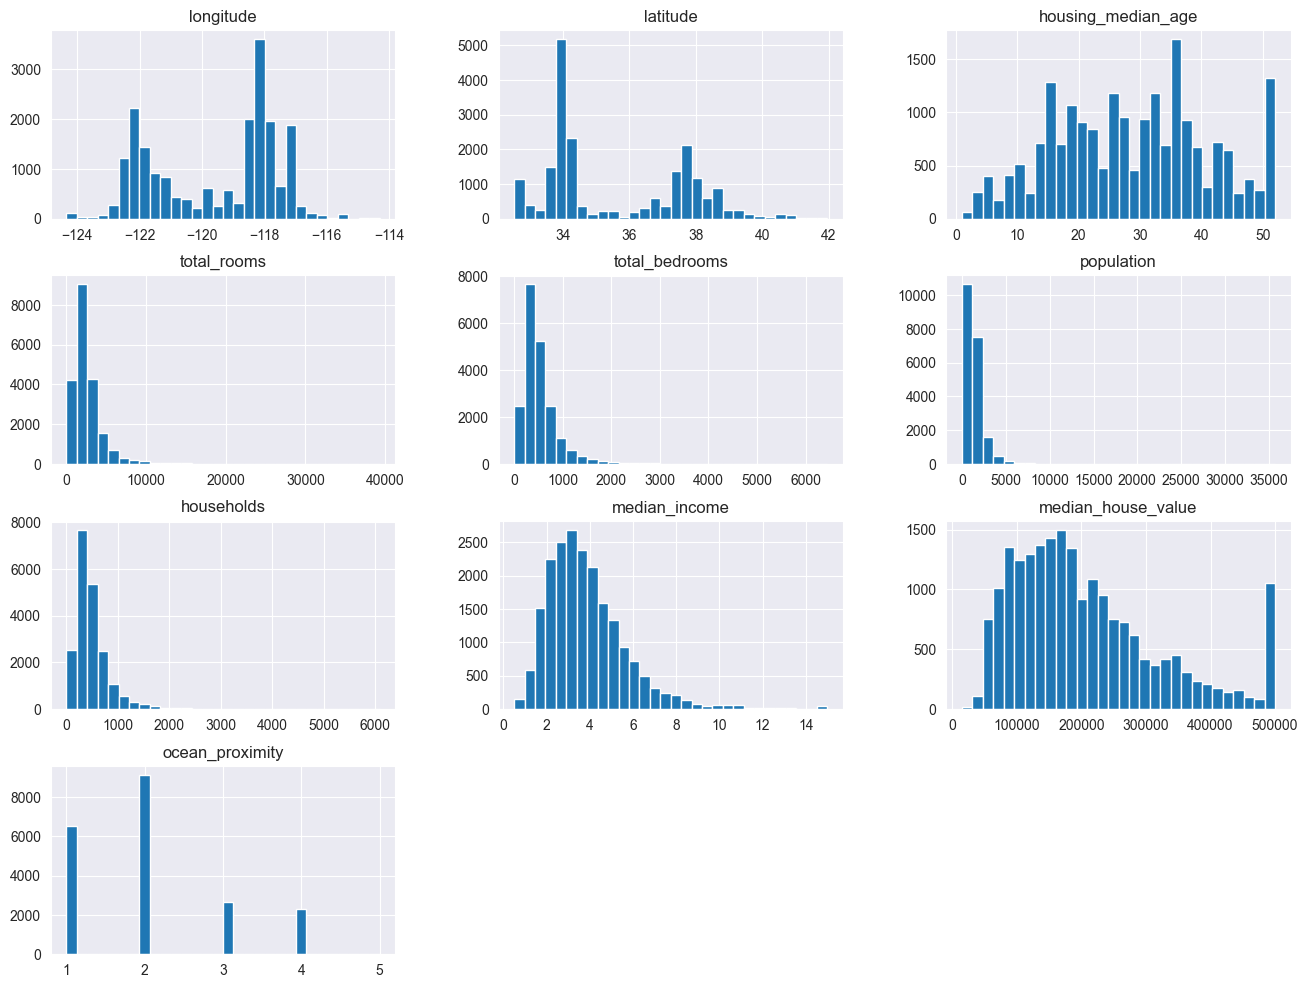

In [786]:
df.hist(bins=30, figsize=(16, 12))

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

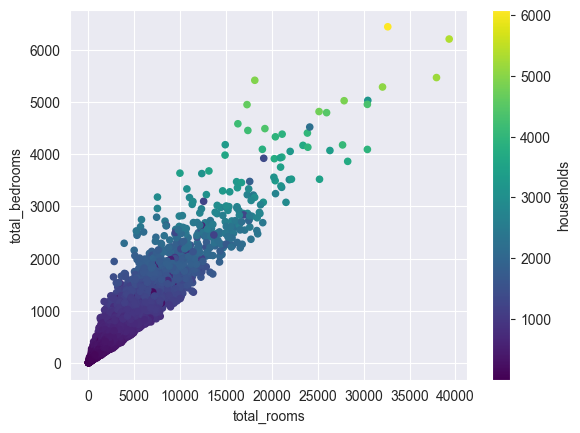

In [787]:
df.plot.scatter(x='total_rooms', y='total_bedrooms', c='households', colormap='viridis')

<Axes: xlabel='population', ylabel='households'>

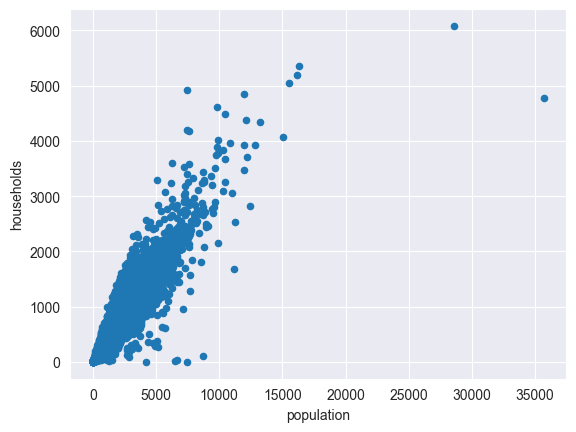

In [788]:
df.plot.scatter(x='population', y='households')

<Axes: >

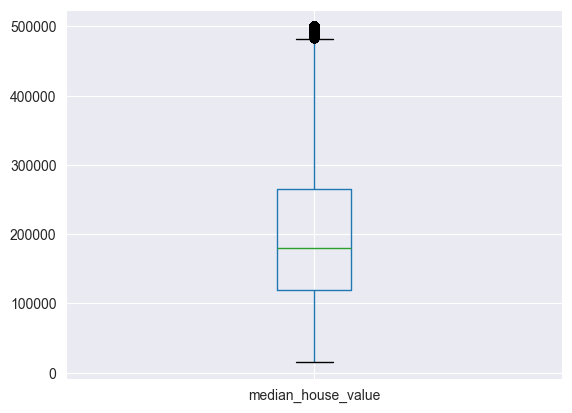

In [789]:
df.boxplot(column=['median_house_value'])

### Observation
The data in all columns, except for `median_income`, conform to their respective distributions and nature. 
The median of `median_income` is 3.534800, max - 15.000100, min - 0.499900. It doesn't look like real values. Probably this column was scaled before.

From the histogram and boxplot we can see that `median_house_value` has outliers, so we are going to remove these rows.


In [790]:
def get_whiskers(dataset):
    q_1 = dataset.quantile(0.25)
    q_3 = dataset.quantile(0.75)
    iqr = q_3 - q_1
    left_whisker = q_1 - 1.5 * iqr
    right_whisker = q_3 + 1.5 * iqr
    return (
        max(dataset.min(), left_whisker),
        min(dataset.max(), right_whisker)
    )
min_income, max_income = get_whiskers(df['median_house_value'])
df = df[df['median_house_value'] < max_income].reset_index()

## Task 8 
Decide if there are any columns you want to drop. If yes, indicate why with a short sentence.

In [791]:
def get_corr_for_median_house_value(dataset):
    corr_matrix = dataset.corr()
    sorted_indexes = corr_matrix['median_house_value'].abs().sort_values(ascending=False).index
    return corr_matrix.loc['median_house_value', sorted_indexes]

get_corr_for_median_house_value(df)

median_house_value    1.000000
median_income         0.644267
ocean_proximity       0.402968
latitude             -0.149100
total_rooms           0.147526
households            0.099352
total_bedrooms        0.078678
index                 0.072636
housing_median_age    0.061480
longitude            -0.047342
population            0.017764
Name: median_house_value, dtype: float64

## Task 9
Decide how you want to deal with any missing values. Do you want to drop those rows? Do you want to fill the missing values with 0, or with the column average, or with the column median, or via backfilling or forward-filling? Give a short reason why you chose this method of dealing with missing values.


<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

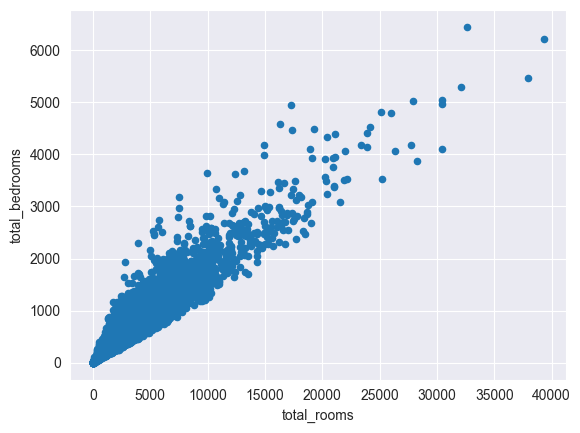

In [792]:
df.plot.scatter(x='total_rooms', y='total_bedrooms')

In [793]:
df['total_rooms'].corr(df['total_bedrooms'])

0.9343518267402339

In [794]:
total_bedrooms = df.sort_values(by='total_rooms')['total_bedrooms'].bfill().copy()
df.loc[total_bedrooms.index, 'total_bedrooms'] = total_bedrooms

In [795]:
df['total_rooms'].corr(df['total_bedrooms'])

0.9342932178060516

In [796]:
df['total_bedrooms'].isna().sum()

0

## Task 10
Choose which columns you want to use as your x-columns (i.e., predictor columns). The median_house_value column should be your y-column (i.e., the column you are trying to predict, and the column that contains the ground truth values). 

<Axes: xlabel='longitude', ylabel='latitude'>

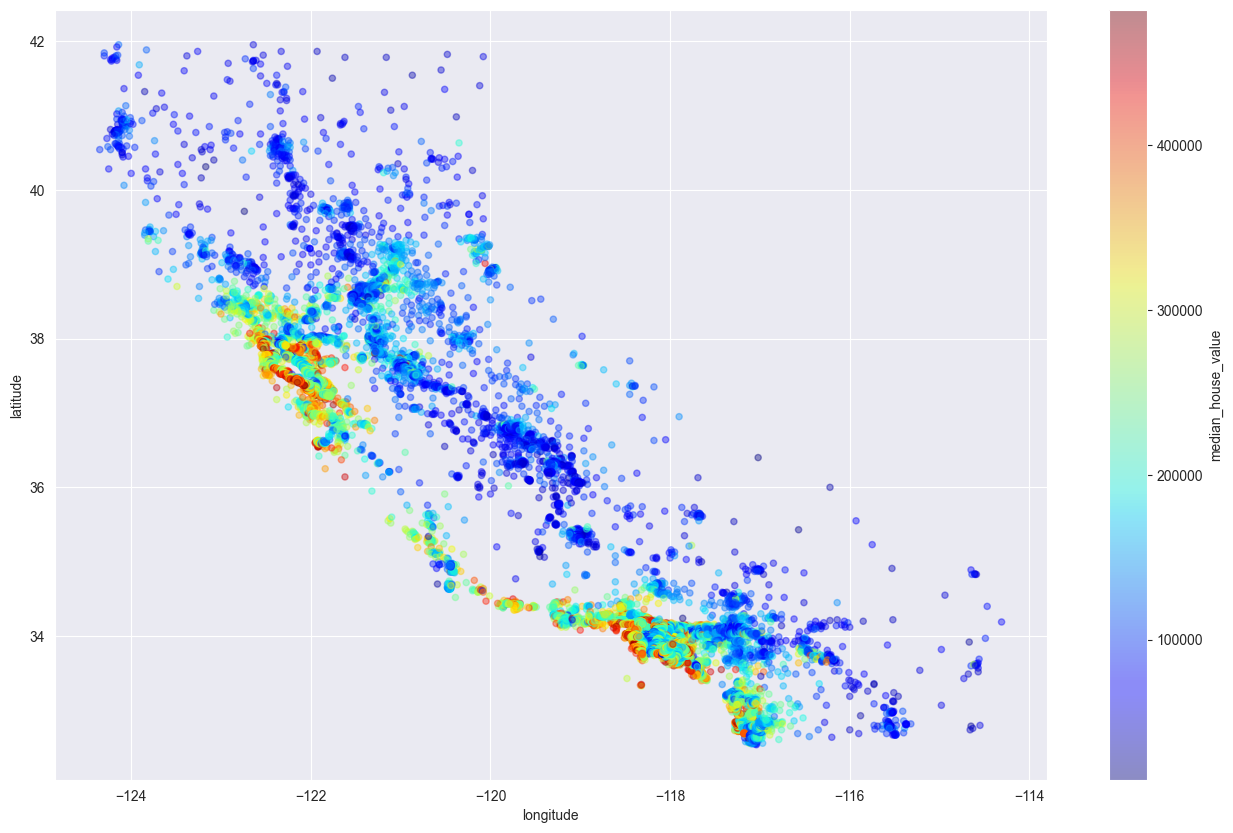

In [797]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16, 10),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [798]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [799]:
get_corr_for_median_house_value(df)

median_house_value    1.000000
median_income         0.644267
ocean_proximity       0.402968
latitude             -0.149100
total_rooms           0.147526
households            0.099352
total_bedrooms        0.079689
index                 0.072636
housing_median_age    0.061480
longitude            -0.047342
population            0.017764
Name: median_house_value, dtype: float64

In [800]:
X = df[['median_income', 'ocean_proximity', 'bedrooms_per_room', 'total_rooms', 'latitude', 'rooms_per_household', 'households', 'longitude', 'housing_median_age', 'total_bedrooms', 'population']]
y = df['median_house_value']

In [801]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


random_state = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

In [802]:
model = LinearRegression().fit(X_train, y_train)

In [803]:
model.score(X_train, y_train)

0.6064049880260831

In [804]:
model.score(X_test, y_test)

0.600248090511055